In [1]:
import pandas as pd

In [2]:
# importing the csv file from scraping
ruipWarComment = pd.read_csv("ru_ip_war_comment.csv")


In [3]:
# Creating respective dataframes 
ruipWarDf = pd.DataFrame(ruipWarComment)

In [4]:
#delete rows with any column with blank value
mergeDf=ruipWarDf.dropna(axis = 0, how = 'any')

In [5]:
mergeDf

,subreddit,commentId,commentTimeStamp,commentAuthor,comment,topic
0,LateStageCapitalism,k6qcp3l,1.698439e+09,MLNYC,If you support a two-state solution that invol...,Israel
1,LateStageCapitalism,k6q41o1,1.698436e+09,BananaJump99,I wrote this reply to a person who was adamant...,Israel
2,LateStageCapitalism,k6qqkgj,1.698445e+09,Amish_Fighter_Pilot,When you support Israel: You also support the ...,Israel
3,LateStageCapitalism,k6qfgft,1.698440e+09,redcolorlover,The ethnic cleansing in Palestine is not even ...,Israel
4,LateStageCapitalism,k6qfziv,1.698440e+09,Kanaima31,"I support Israelis and Palestinians, their gov...",Israel
...,...,...,...,...,...,...
209147,agedlikemilk,k7k8izw,1.698959e+09,Sukeed,"Quite anti-religious, so by default I'm islamo...",Israel
209148,agedlikemilk,k7kfo7m,1.698962e+09,Sukeed,Sounds like childs play compared to what the I...,Israel
209149,agedlikemilk,k7kg51l,1.698962e+09,Thisnameisdildos,And there it is.\n\n>Palestine has no right to...,Israel
209150,agedlikemilk,k7klrwu,1.698964e+09,Sukeed,"1 Palestinian isn't a race, neither is Muslim....",Israel


In [6]:
#deleting records whose author are Auto-Moderators
mods=['Palestine-ModTeam','AutoModerator','IsraelPalestine-ModTeam','RussiaUkraineWar2022-ModTeam']

mergeDf=mergeDf.query("commentAuthor not in ['Palestine-ModTeam','AutoModerator','IsraelPalestine-ModTeam','RussiaUkraineWar2022-ModTeam']")

In [7]:
#remove duplicate comment ids
mergeDf.drop_duplicates(subset=['commentId'],inplace=True)

C:\Users\BABLID~1\AppData\Local\Temp/ipykernel_5076/733199239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergeDf.drop_duplicates(subset=['commentId'],inplace=True)


In [8]:
#check after removing duplicates
mergeDf

,subreddit,commentId,commentTimeStamp,commentAuthor,comment,topic
0,LateStageCapitalism,k6qcp3l,1.698439e+09,MLNYC,If you support a two-state solution that invol...,Israel
1,LateStageCapitalism,k6q41o1,1.698436e+09,BananaJump99,I wrote this reply to a person who was adamant...,Israel
2,LateStageCapitalism,k6qqkgj,1.698445e+09,Amish_Fighter_Pilot,When you support Israel: You also support the ...,Israel
3,LateStageCapitalism,k6qfgft,1.698440e+09,redcolorlover,The ethnic cleansing in Palestine is not even ...,Israel
4,LateStageCapitalism,k6qfziv,1.698440e+09,Kanaima31,"I support Israelis and Palestinians, their gov...",Israel
...,...,...,...,...,...,...
209067,Destiny,k41kpyk,1.696799e+09,SnooChickens7571,Wdym his literally giving arguments to which y...,Israel
209080,agedlikemilk,k7kmj45,1.698965e+09,Gabbiliciousxoxo,Occupied palestine*,Israel
209093,agedlikemilk,k7lgn1b,1.698977e+09,echino_derm,They aren't defending shit. None of what israe...,Israel
209117,agedlikemilk,k7idrcp,1.698935e+09,Ben-D-Beast,Reddit in general is weirdly pro hamas people ...,Israel


Pre - Processing steps start

In [10]:
#pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.5/1.5 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 97.9/97.9 kB 5.8 MB/s eta 0:00:00
     -------------------------------------- 269.6/269.6 kB 5.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'@[A-Za-z0–9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the ‘#’ symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':','', text) # Remove :

    # Convert to lowercase
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update(['one','even','u'])
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text



preprocessedComment = []
for comment in mergeDf['comment']:  
    inputText = comment
    preprocessed_text = preprocess_text(inputText)
    preprocessedComment.append(preprocessed_text)



[nltk_data] Downloading package punkt to C:\Users\Babli
[nltk_data]     Dey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Babli
[nltk_data]     Dey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Babli
[nltk_data]     Dey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
mergeDf['preProcessedComment']=preprocessedComment



C:\Users\BABLID~1\AppData\Local\Temp/ipykernel_5076/3130759299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergeDf['preProcessedComment']=preprocessedComment


In [11]:
mergeDf.sample(10)

,subreddit,commentId,commentTimeStamp,commentAuthor,comment,topic,preProcessedComment
91963,CredibleDefense,icbo3w5,1.655211e+09,jrex035,This is exactly the kind of nonsense I'm refer...,ukraine Conflict,exactly kind nonsense im referring russia hasn...
48759,PublicFreakout,k4c5afo,1.696976e+09,circumtopia,You're right it's only for medical and humanit...,Israel,youre right medical humanitarian aid surprisin...
117758,insanepeoplefacebook,iqyqdh0,1.664849e+09,helium_farts,"Nah, that's getting off way too easy.\n\nI hop...",.russia.ukraine.,nah thats getting way easy hope life long long...
16185,politics,k4uzwgb,1.697301e+09,smot420,They retaliated in the worse way possible: by ...,Israel,retaliated worse way possible ambushing innoce...
32567,worldnews,k9obocl,1.700250e+09,FuneralQsThrowaway,Hezbollah actually rules over southern Lebanon...,Israel,hezbollah actually rule southern lebanon way c...
205041,worldnews,k4pzhno,1.697213e+09,100and33,"Hopefully, Israel's commanders and soldiers ar...",Israel,hopefully israel commander soldier arent blood...
67755,worldnews,k7sfiwd,1.699107e+09,NoHetro,"the bombing on Gaza didn't happen in a vacuum,...",Israel,bombing gaza didnt happen vacuum hamas palesti...
50277,worldnews,k4oi3ar,1.697185e+09,Erik1801,"Alright then, what exactly is Israel doing tha...",Israel,alright exactly israel make genocide yes allll...
7166,MapPorn,k3vn9lr,1.696700e+09,prettybluefoxes,Map of the situation in occupied Palestine.,Israel,map situation occupied palestine
63642,worldnews,k4cvfto,1.696987e+09,sikagoon7,You mean attempting to kill Palestinian leader...,Israel,mean attempting kill palestinian leader recogn...


Word Cloud

In [16]:
#pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 300.0/300.0 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


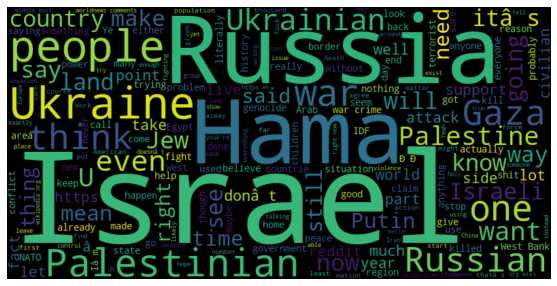

In [13]:
#word cloud on comments
import matplotlib.pyplot as plt
from wordcloud import WordCloud


all_text = ' '.join(mergeDf['comment'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()


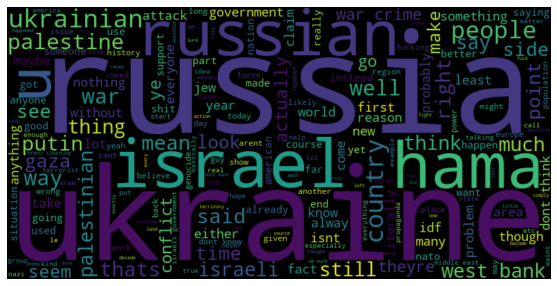

In [18]:
# word cloud on pre processed comments

import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_text = ' '.join(mergeDf['preProcessedComment'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()


LDA - Topic Modelling

In [20]:
#pip install gensim

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 24.0/24.0 MB 14.2 MB/s eta 0:00:00
     ---------------------------------------- 57.0/57.0 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
# LDA topic modelling

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
from gensim import corpora

stop_words = set(stopwords.words('english'))

def preprocess_text(preProcessedComment):
    words = word_tokenize(preProcessedComment)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return words




In [16]:

from gensim import corpora


documents = mergeDf['preProcessedComment'].apply(preprocess_text).tolist()

dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]


In [17]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics=7, id2word=dictionary, passes=15)


In [19]:
for idx, topic in lda_model.print_topics():
    print(f'Topic {idx + 1}: {topic}')


Topic 1: 0.011*"know" + 0.010*"im" + 0.010*"comment" + 0.009*"like" + 0.009*"dont" + 0.008*"youre" + 0.008*"say" + 0.008*"think" + 0.008*"said" + 0.008*"propaganda"
Topic 2: 0.068*"israel" + 0.047*"palestinian" + 0.023*"land" + 0.022*"state" + 0.021*"palestine" + 0.020*"gaza" + 0.017*"israeli" + 0.012*"bank" + 0.011*"west" + 0.011*"arab"
Topic 3: 0.089*"russia" + 0.084*"russian" + 0.082*"ukrainian" + 0.079*"ukraine" + 0.022*"putin" + 0.019*"war" + 0.014*"nato" + 0.010*"force" + 0.009*"invasion" + 0.008*"army"
Topic 4: 0.041*"jew" + 0.020*"jewish" + 0.018*"people" + 0.014*"muslim" + 0.014*"arab" + 0.013*"country" + 0.011*"population" + 0.011*"ethnic" + 0.011*"israel" + 0.010*"group"
Topic 5: 0.035*"hamas" + 0.026*"civilian" + 0.023*"israel" + 0.017*"gaza" + 0.010*"israeli" + 0.010*"attack" + 0.010*"child" + 0.008*"killed" + 0.006*"terrorist" + 0.006*"war"
Topic 6: 0.031*"u" + 0.011*"would" + 0.010*"country" + 0.010*"military" + 0.008*"aid" + 0.008*"iran" + 0.008*"money" + 0.007*"trump" 

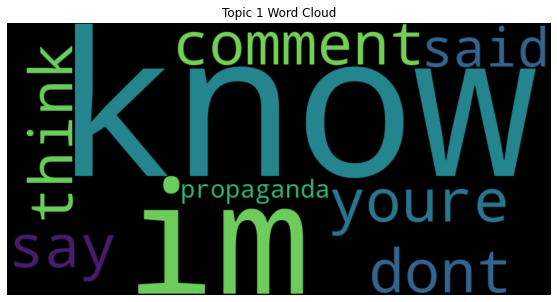

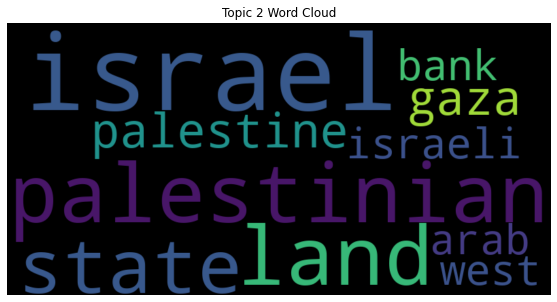

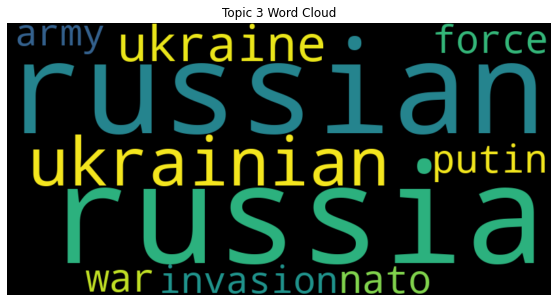

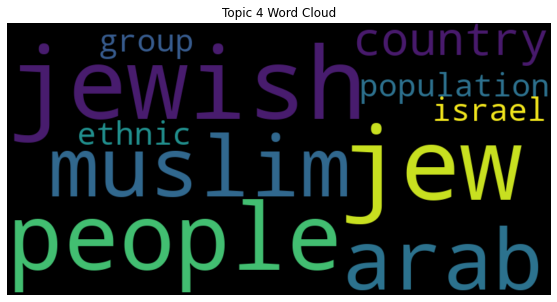

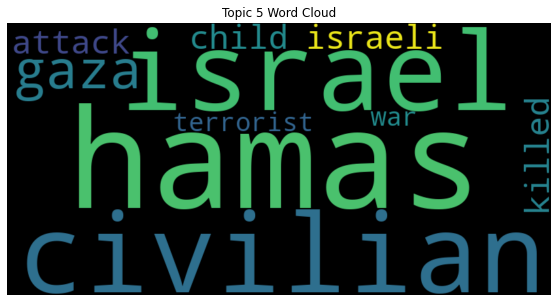

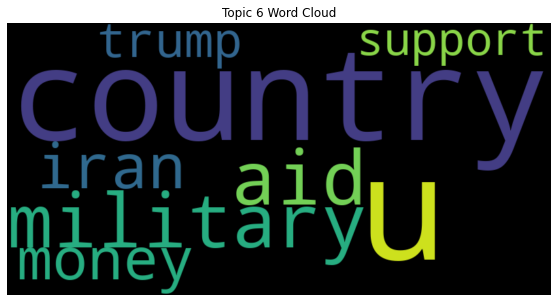

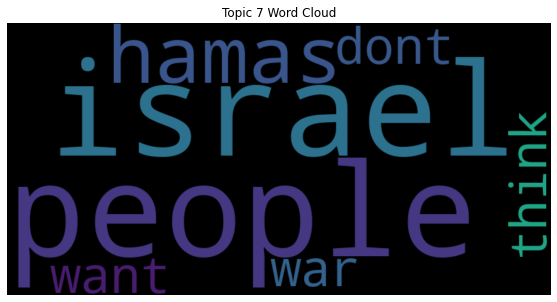

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Visualize word clouds for each topic
for idx, topic in lda_model.print_topics():
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(topic)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()


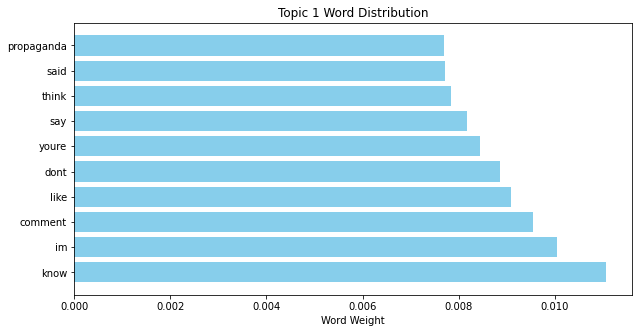

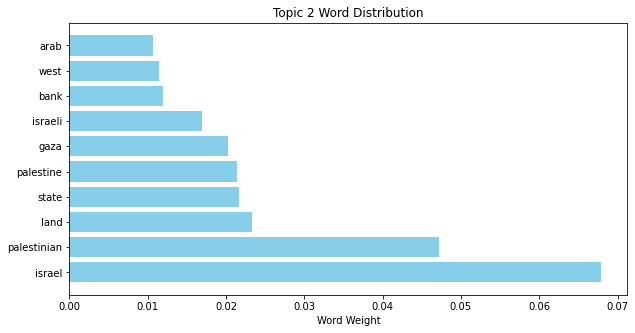

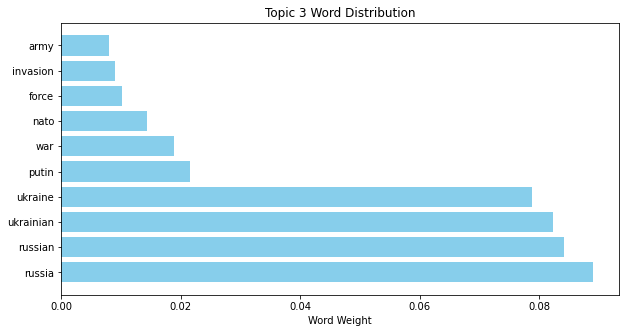

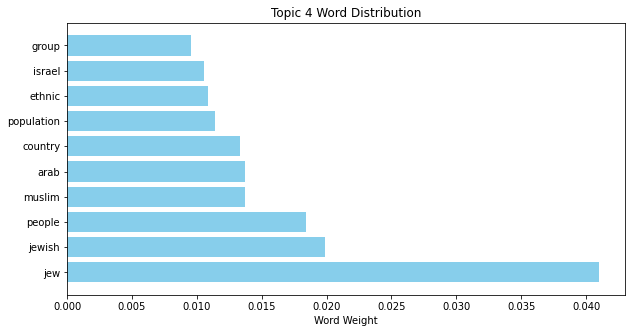

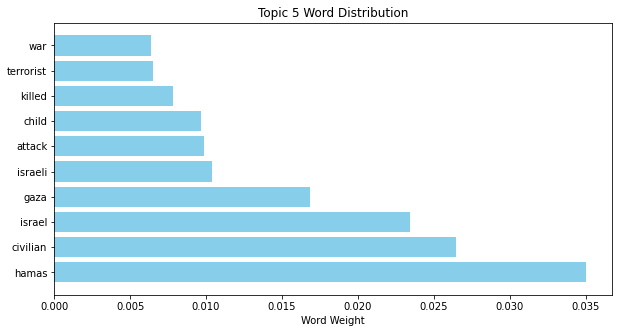

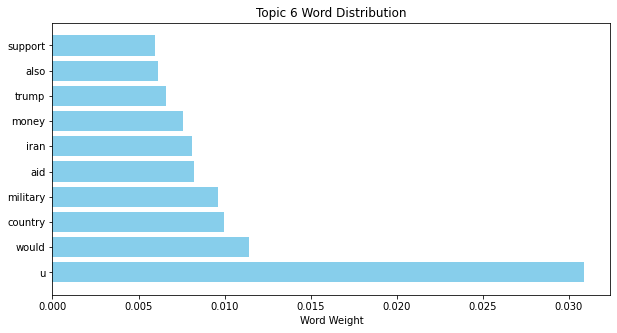

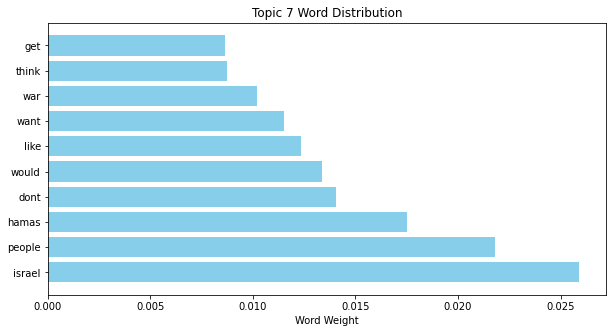

In [21]:
import matplotlib.pyplot as plt

# Visualize bar plots for each topic
for idx, topic in lda_model.print_topics():
    words = [word for word, _ in lda_model.show_topic(idx)]
    weights = [weight for _, weight in lda_model.show_topic(idx)]
    
    plt.figure(figsize=(10, 5))
    plt.barh(words, weights, color='skyblue')
    plt.title(f'Topic {idx + 1} Word Distribution')
    plt.xlabel('Word Weight')
    plt.show()


In [28]:
#pip install wordcloud matplotlib pyLDAvis


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 2.6/2.6 MB 7.9 MB/s eta 0:00:00
     ---------------------------------------- 96.4/96.4 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize topics with pyLDAvis
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)


Based on Regular expression tried to categorize the parsed comment into 4 categories: russia-ukraine, israel-palestine, both, other.

In [23]:
import re

def categorize_topic(comment):
    # Define regular expressions for Russia-Ukraine and Israel-Palestine
    russia_ukraine_pattern = re.compile(r'\b(?:russia|ukraine|russian|ukrainian|crimea|putin|donbas)\b', flags=re.IGNORECASE)
    israel_palestine_pattern = re.compile(r'\b(?:israel|palestine|israeli|palestinian|hamas|gaza|zionist|pro israel|genocide|jew|israelite|israelipalestinian|antiisrael|freepalestine)\b', flags=re.IGNORECASE)

    # Check if the comment mentions Russia-Ukraine or Israel-Palestine
    mentions_russia_ukraine = bool(russia_ukraine_pattern.search(comment))
    mentions_israel_palestine = bool(israel_palestine_pattern.search(comment))

    # Categorize the comment based on the topics
    if mentions_russia_ukraine and mentions_israel_palestine:
        return 'Both'  # If the comment mentions both topics
    elif mentions_russia_ukraine:
        return 'Russia-Ukraine'
    elif mentions_israel_palestine:
        return 'Israel-Palestine'
    else:
        return 'Other'  # If the comment doesn't mention either topic (may include typos)

commentCategory = []
# Categorize each comment
for comment in mergeDf['preProcessedComment']:
    category = categorize_topic(str(comment))
    commentCategory.append(category)
    


In [24]:
#added the comment categorg to the data frame.
mergeDf['commentCategory']=commentCategory

C:\Users\BABLID~1\AppData\Local\Temp/ipykernel_5076/2745203144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergeDf['commentCategory']=commentCategory


In [20]:
#mergeDf.to_csv("comment_category_v1.csv")

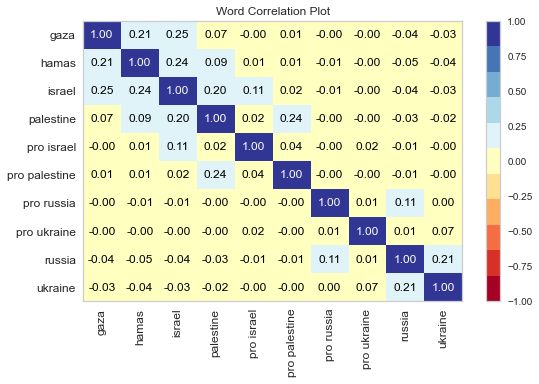

WordCorrelationPlot(ax=<Axes: title={'center': 'Word Correlation Plot'}>,
                    cmap=<matplotlib.colors.ListedColormap object at 0x000001ADBA88E680>,
                    words=['gaza', 'hamas', 'israel', 'palestine', 'pro israel',
                           'pro palestine', 'pro russia', 'pro ukraine',
                           'russia', 'ukraine'])

In [25]:
from yellowbrick.text.correlation import word_correlation

corpus = mergeDf['comment']

words = ["russia","ukraine","palestine","israel","hamas","gaza","pro israel","pro palestine","pro ukraine","pro russia"]

word_correlation(words,corpus)

In [26]:
mergeDf

,subreddit,commentId,commentTimeStamp,commentAuthor,comment,topic,preProcessedComment,commentCategory
0,LateStageCapitalism,k6qcp3l,1.698439e+09,MLNYC,If you support a two-state solution that invol...,Israel,support twostate solution involves independent...,Israel-Palestine
1,LateStageCapitalism,k6q41o1,1.698436e+09,BananaJump99,I wrote this reply to a person who was adamant...,Israel,wrote reply person adamant war would end hamas...,Israel-Palestine
2,LateStageCapitalism,k6qqkgj,1.698445e+09,Amish_Fighter_Pilot,When you support Israel: You also support the ...,Israel,support israel also support beating imprisonme...,Israel-Palestine
3,LateStageCapitalism,k6qfgft,1.698440e+09,redcolorlover,The ethnic cleansing in Palestine is not even ...,Israel,ethnic cleansing palestine jewish people islam...,Israel-Palestine
4,LateStageCapitalism,k6qfziv,1.698440e+09,Kanaima31,"I support Israelis and Palestinians, their gov...",Israel,support israeli palestinian government ehm much,Israel-Palestine
...,...,...,...,...,...,...,...,...
209067,Destiny,k41kpyk,1.696799e+09,SnooChickens7571,Wdym his literally giving arguments to which y...,Israel,wdym literally giving argument dont reply he r...,Israel-Palestine
209080,agedlikemilk,k7kmj45,1.698965e+09,Gabbiliciousxoxo,Occupied palestine*,Israel,occupied palestine,Israel-Palestine
209093,agedlikemilk,k7lgn1b,1.698977e+09,echino_derm,They aren't defending shit. None of what israe...,Israel,arent defending shit none israel done going re...,Israel-Palestine
209117,agedlikemilk,k7idrcp,1.698935e+09,Ben-D-Beast,Reddit in general is weirdly pro hamas people ...,Israel,reddit general weirdly pro hamas people quick ...,Israel-Palestine


In [ ]:
# get sample size for training
#sample=mergeDf.groupby('commentCategory',group_keys=False).apply(lambda x: x.sample(100))
#sample.to_csv("sample.csv")

In [22]:
#remove the sample data from the dataset

sampleDf=pd.read_csv("sample.csv")


commentId=sampleDf["commentId"]

In [23]:
# filter the dataset by sample Id
testDf = mergeDf[~mergeDf['commentId'].isin(commentId)]

In [24]:
testDf

,subreddit,commentId,commentTimeStamp,commentAuthor,comment,topic,preProcessedComment,commentCategory
0,LateStageCapitalism,k6qcp3l,1.698439e+09,MLNYC,If you support a two-state solution that invol...,Israel,support twostate solution involves independent...,Israel-Palestine
1,LateStageCapitalism,k6q41o1,1.698436e+09,BananaJump99,I wrote this reply to a person who was adamant...,Israel,wrote reply person adamant war would end hamas...,Israel-Palestine
2,LateStageCapitalism,k6qqkgj,1.698445e+09,Amish_Fighter_Pilot,When you support Israel: You also support the ...,Israel,support israel also support beating imprisonme...,Israel-Palestine
3,LateStageCapitalism,k6qfgft,1.698440e+09,redcolorlover,The ethnic cleansing in Palestine is not even ...,Israel,ethnic cleansing palestine jewish people islam...,Israel-Palestine
4,LateStageCapitalism,k6qfziv,1.698440e+09,Kanaima31,"I support Israelis and Palestinians, their gov...",Israel,support israeli palestinian government ehm much,Israel-Palestine
...,...,...,...,...,...,...,...,...
65483,Destiny,k41kpyk,1.696799e+09,SnooChickens7571,Wdym his literally giving arguments to which y...,Israel,wdym literally giving argument dont reply he r...,Israel-Palestine
65496,agedlikemilk,k7kmj45,1.698965e+09,Gabbiliciousxoxo,Occupied palestine*,Israel,occupied palestine,Israel-Palestine
65509,agedlikemilk,k7lgn1b,1.698977e+09,echino_derm,They aren't defending shit. None of what israe...,Israel,arent defending shit none israel done going re...,Israel-Palestine
65533,agedlikemilk,k7idrcp,1.698935e+09,Ben-D-Beast,Reddit in general is weirdly pro hamas people ...,Israel,reddit general weirdly pro hamas people quick ...,Israel-Palestine


In [21]:
# take 1000 sample size  from each category for making prediction
test1k=mergeDf.groupby('commentCategory',group_keys=False).apply(lambda x: x.sample(1000))

In [25]:
test1k = pd.read_excel("test1k.xlsx")